In [1]:
#%pip install scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textblob as tb
import nltk as nl
import sklearn as sk

#from sklearn.datasets import ai_vs_human_dataset_

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv("ai_vs_human_dataset_medium.csv")

In [5]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    int64  
 1   label             500 non-null    object 
 2   topic             500 non-null    object 
 3   text              500 non-null    object 
 4   length_chars      500 non-null    int64  
 5   length_words      500 non-null    int64  
 6   quality_score     500 non-null    float64
 7   sentiment         500 non-null    float64
 8   source_detail     500 non-null    object 
 9   timestamp         500 non-null    object 
 10  plagiarism_score  500 non-null    float64
 11  notes             157 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


,id,label,topic,text,length_chars,length_words,quality_score,sentiment,source_detail,timestamp,plagiarism_score,notes
count,500.000000,500,500,500,500.000000,500.00000,500.000000,500.000000,500,500,500.000000,157
unique,NaN,2,10,459,NaN,NaN,NaN,NaN,95,500,NaN,1
top,NaN,ai,food,Analysis indicates that food is associated wit...,NaN,NaN,NaN,NaN,claude-2,2023-12-19 11:21:46,NaN,personal_tone
freq,NaN,251,56,3,NaN,NaN,NaN,NaN,61,1,NaN,157
mean,250.500000,NaN,NaN,NaN,115.152000,16.79800,3.502340,0.161240,NaN,NaN,0.124510,NaN
std,144.481833,NaN,NaN,NaN,39.208973,5.83449,0.900641,0.416834,NaN,NaN,0.095412,NaN
min,1.000000,NaN,NaN,NaN,65.000000,9.00000,1.500000,-0.590000,NaN,NaN,0.000000,NaN
25%,125.750000,NaN,NaN,NaN,87.000000,13.00000,2.847500,-0.170000,NaN,NaN,0.050000,NaN
50%,250.500000,NaN,NaN,NaN,103.000000,14.00000,3.540000,0.190000,NaN,NaN,0.104500,NaN
75%,375.250000,NaN,NaN,NaN,133.250000,20.00000,4.240000,0.490000,NaN,NaN,0.171500,NaN


In [6]:
print("--- DESCRIZIONE STATISTICA ---")
print(df.describe())

--- DESCRIZIONE STATISTICA ---
               id  length_chars  length_words  quality_score   sentiment  \
count  500.000000    500.000000     500.00000     500.000000  500.000000   
mean   250.500000    115.152000      16.79800       3.502340    0.161240   
std    144.481833     39.208973       5.83449       0.900641    0.416834   
min      1.000000     65.000000       9.00000       1.500000   -0.590000   
25%    125.750000     87.000000      13.00000       2.847500   -0.170000   
50%    250.500000    103.000000      14.00000       3.540000    0.190000   
75%    375.250000    133.250000      20.00000       4.240000    0.490000   
max    500.000000    280.000000      41.00000       5.000000    0.900000   

       plagiarism_score  
count        500.000000  
mean           0.124510  
std            0.095412  
min            0.000000  
25%            0.050000  
50%            0.104500  
75%            0.171500  
max            0.349000  


# Contare i nulli per ogni colonna

In [7]:
df.isnull().sum()

id                    0
label                 0
topic                 0
text                  0
length_chars          0
length_words          0
quality_score         0
sentiment             0
source_detail         0
timestamp             0
plagiarism_score      0
notes               343
dtype: int64

#Rimozione duplicati

In [8]:
print("Duplicati presenti:", df.duplicated().sum())

df = df.drop_duplicates()

print("Duplicati dopo pulizia:", df.duplicated().sum())

Duplicati presenti: 0
Duplicati dopo pulizia: 0


In [9]:
# Colonne numeriche e categoriche
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Riempimento numeriche
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Riempimento categoriche
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Utente\AppData\Local\Temp\ipykernel_16472\1826723801.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Utente\AppData\Local\Temp\ipykernel_16472\1826723801.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Pulizia stringhe

In [10]:
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    int64  
 1   label             500 non-null    object 
 2   topic             500 non-null    object 
 3   text              500 non-null    object 
 4   length_chars      500 non-null    int64  
 5   length_words      500 non-null    int64  
 6   quality_score     500 non-null    float64
 7   sentiment         500 non-null    float64
 8   source_detail     500 non-null    object 
 9   timestamp         500 non-null    object 
 10  plagiarism_score  500 non-null    float64
 11  notes             500 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


Outlier

In [11]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                451 non-null    int64  
 1   label             451 non-null    object 
 2   topic             451 non-null    object 
 3   text              451 non-null    object 
 4   length_chars      451 non-null    int64  
 5   length_words      451 non-null    int64  
 6   quality_score     451 non-null    float64
 7   sentiment         451 non-null    float64
 8   source_detail     451 non-null    object 
 9   timestamp         451 non-null    object 
 10  plagiarism_score  451 non-null    float64
 11  notes             451 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 45.8+ KB


In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                451 non-null    int64  
 1   label             451 non-null    object 
 2   topic             451 non-null    object 
 3   text              451 non-null    object 
 4   length_chars      451 non-null    int64  
 5   length_words      451 non-null    int64  
 6   quality_score     451 non-null    float64
 7   sentiment         451 non-null    float64
 8   source_detail     451 non-null    object 
 9   timestamp         451 non-null    object 
 10  plagiarism_score  451 non-null    float64
 11  notes             451 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 45.8+ KB


,id,length_chars,length_words,quality_score,sentiment,plagiarism_score
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,251.011086,106.104213,15.434590,3.497029,0.167805,0.120931
std,144.107066,25.373832,3.756127,0.881667,0.411825,0.092213
min,1.000000,65.000000,9.000000,1.500000,-0.590000,0.000000
25%,125.500000,86.000000,13.000000,2.860000,-0.160000,0.050500
50%,254.000000,99.000000,14.000000,3.530000,0.200000,0.101000
75%,375.000000,125.500000,18.000000,4.195000,0.490000,0.162000
max,500.000000,194.000000,25.000000,5.000000,0.900000,0.341000


In [13]:
df.to_csv("ai_vs_human_dataset_medium_clean.csv", index=False)

Pulizia caratteri sporchi

In [14]:
import re

def clean_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()

    # rimuove HTML
    text = re.sub(r"<.*?>", " ", text)

    # rimuove URL
    text = re.sub(r"http\S+|www\S+", " ", text)

    # rimuove emoji
    text = re.sub(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "]+",
        " ",
        text
    )

    # rimuove caratteri non alfabetici
    text = re.sub(r"[^a-zàèéìòù\s]", " ", text)

    # rimuove ripetizioni (es. aaaaa)
    text = re.sub(r"(.)\1{3,}", r"\1", text)

    # normalizza spazi
    text = re.sub(r"\s+", " ", text).strip()

    return text



In [15]:
df["clean_text"] = df["text"].apply(clean_text)

df[["text", "clean_text"]].head()

,text,clean_text
0,"as someone who follows food, i believe privacy...",as someone who follows food i believe privacy ...
1,analysis indicates that travel is associated w...,analysis indicates that travel is associated w...
2,i recently experienced education in my day-to-...,i recently experienced education in my day to ...
3,analysis indicates that sports is associated w...,analysis indicates that sports is associated w...
4,"in my experience, finance often leads to users...",in my experience finance often leads to users ...


Rimozione testi vuoti o inutili

In [16]:
df = df[df["clean_text"].str.len() > 5]

In [17]:
#lunghezza testo

df["text_len"] = df["clean_text"].str.len()

max_len = df["text_len"].quantile(0.99)

df = df[(df["text_len"] >= 5) & (df["text_len"] <= max_len)]

In [18]:
#Numero parole

df["word_count"] = df["clean_text"].str.split().str.len()

df = df[(df["word_count"] >= 2) & (df["word_count"] <= df["word_count"].quantile(0.99))]

In [19]:
#Rimozione colonne tecniche
df.drop(columns=["text_len", "word_count"], inplace=True)

In [20]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 0 to 499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                444 non-null    int64  
 1   label             444 non-null    object 
 2   topic             444 non-null    object 
 3   text              444 non-null    object 
 4   length_chars      444 non-null    int64  
 5   length_words      444 non-null    int64  
 6   quality_score     444 non-null    float64
 7   sentiment         444 non-null    float64
 8   source_detail     444 non-null    object 
 9   timestamp         444 non-null    object 
 10  plagiarism_score  444 non-null    float64
 11  notes             444 non-null    object 
 12  clean_text        444 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 48.6+ KB


,id,label,topic,text,length_chars,length_words,quality_score,sentiment,source_detail,timestamp,plagiarism_score,notes,clean_text
0,305,human,food,"as someone who follows food, i believe privacy...",126,22,2.37,0.44,author_50,2023-12-19 11:21:46,0.045,personal_tone,as someone who follows food i believe privacy ...
1,341,ai,travel,analysis indicates that travel is associated w...,141,19,3.44,0.60,gpt-5-base,2024-04-01 17:43:26,0.007,personal_tone,analysis indicates that travel is associated w...
2,48,human,education,i recently experienced education in my day-to-...,112,17,3.16,-0.43,author_33,2025-08-28 07:56:09,0.163,personal_tone,i recently experienced education in my day to ...
3,68,ai,sports,analysis indicates that sports is associated w...,101,14,3.32,0.44,claude-2,2023-10-23 14:34:48,0.122,personal_tone,analysis indicates that sports is associated w...
4,480,human,finance,"in my experience, finance often leads to users...",78,14,3.52,-0.31,author_87,2024-11-28 11:31:37,0.105,personal_tone,in my experience finance often leads to users ...


Rapporto parole/caratteri


In [21]:
def word_char_ratio(text):
    if not isinstance(text, str) or len(text) == 0:
        return 0
    words = text.split()
    chars = len(text)
    return len(words) / chars

df["word_char_ratio"] = df["text"].apply(word_char_ratio)


Valore assoluto sentiment

In [22]:
from textblob import TextBlob

def abs_sentiment(text):
    if not isinstance(text, str):
        return 0
    sentiment = TextBlob(text).sentiment.polarity
    return abs(sentiment)

df["abs_sentiment"] = df["text"].apply(abs_sentiment)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 0 to 499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                444 non-null    int64  
 1   label             444 non-null    object 
 2   topic             444 non-null    object 
 3   text              444 non-null    object 
 4   length_chars      444 non-null    int64  
 5   length_words      444 non-null    int64  
 6   quality_score     444 non-null    float64
 7   sentiment         444 non-null    float64
 8   source_detail     444 non-null    object 
 9   timestamp         444 non-null    object 
 10  plagiarism_score  444 non-null    float64
 11  notes             444 non-null    object 
 12  clean_text        444 non-null    object 
 13  word_char_ratio   444 non-null    float64
 14  abs_sentiment     444 non-null    float64
dtypes: float64(5), int64(3), object(7)
memory usage: 55.5+ KB


Indicatori di stile linguistico

In [23]:
import nltk

nltk.download("punkt")
nltk.download("stopwords")

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [25]:
def linguistic_features(text):
    if not isinstance(text, str) or len(text) == 0:
        return pd.Series([0, 0, 0, 0])

    words = word_tokenize(text.lower())
    sentences = sent_tokenize(text)

    words_alpha = [w for w in words if w.isalpha()]

    avg_word_len = sum(len(w) for w in words_alpha) / max(len(words_alpha), 1)
    avg_sentence_len = len(words_alpha) / max(len(sentences), 1)

    type_token_ratio = len(set(words_alpha)) / max(len(words_alpha), 1)

    function_word_ratio = (
        len([w for w in words_alpha if w in stop_words]) / max(len(words_alpha), 1)
    )

    return pd.Series([
        avg_word_len,
        avg_sentence_len,
        type_token_ratio,
        function_word_ratio
    ])

GRAFICI

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carica il file CSV
df = pd.read_csv('ai_vs_human_dataset_medium_clean.csv')
# Selezione delle colonne di interesse
cols_interesse = ['quality_score', 'plagiarism_score']
data_subset = df[cols_interesse]
print(df)

      id  label          topic  \
0    305  human           food   
1    341     ai         travel   
2     48  human      education   
3     68     ai         sports   
4    480  human        finance   
..   ...    ...            ...   
446  256  human      lifestyle   
447   73     ai        science   
448  397     ai        science   
449  236  human  entertainment   
450   38  human        finance   

                                                  text  length_chars  \
0    as someone who follows food, i believe privacy...           126   
1    analysis indicates that travel is associated w...           141   
2    i recently experienced education in my day-to-...           112   
3    analysis indicates that sports is associated w...           101   
4    in my experience, finance often leads to users...            78   
..                                                 ...           ...   
446  as someone who follows lifestyle, i believe th...           119   
447  this artic

Text(0.5, 1.0, 'Distribuzione di Plagiarism Score')

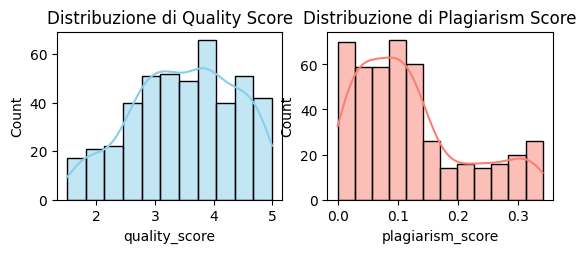

In [ ]:

# 1. ISTOGRAMMI (Distribuzione delle variabili)
plt.subplot(2, 2, 1)
sns.histplot(df['quality_score'], kde=True, color='skyblue')
plt.title('Distribuzione di Quality Score')

plt.subplot(2, 2, 2)
sns.histplot(df['plagiarism_score'], kde=True, color='salmon')
plt.title('Distribuzione di Plagiarism Score')

C:\Users\Utente\AppData\Local\Temp\ipykernel_33136\1477312773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='quality_score', data=df, palette='Set2')
C:\Users\Utente\AppData\Local\Temp\ipykernel_33136\1477312773.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='plagiarism_score', data=df, palette='Set2')


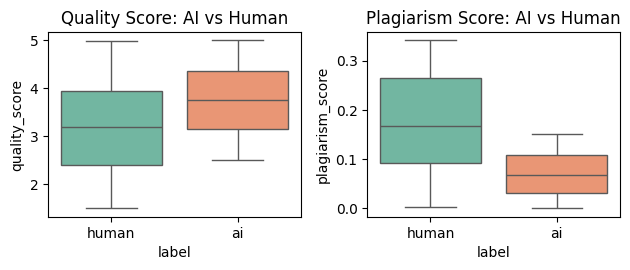

In [ ]:
# 2. BOXPLOT (Analisi statistica e Outlier)
# Confrontiamo i punteggi in base all'etichetta (AI vs Human) per dare più senso al grafico
plt.subplot(2, 2, 3)
sns.boxplot(x='label', y='quality_score', data=df, palette='Set2')
plt.title('Quality Score: AI vs Human')

plt.subplot(2, 2, 4)
sns.boxplot(x='label', y='plagiarism_score', data=df, palette='Set2')
plt.title('Plagiarism Score: AI vs Human')

plt.tight_layout()
plt.show()

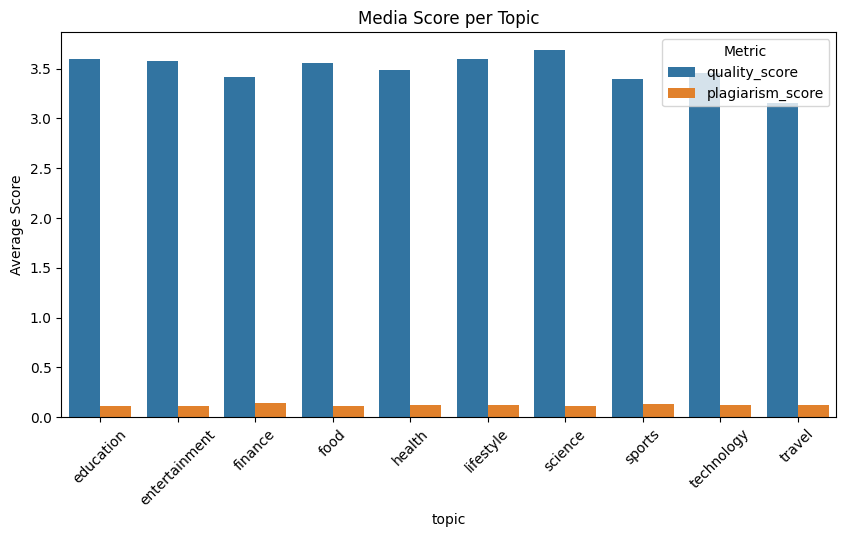

In [ ]:
# 3. GRAFICO A BARRE (Media per categoria)
plt.figure(figsize=(10, 5))
df_avg = df.groupby('topic')[['quality_score', 'plagiarism_score']].mean().reset_index()
df_melted = df_avg.melt(id_vars='topic', var_name='Metric', value_name='Average Score')
sns.barplot(x='topic', y='Average Score', hue='Metric', data=df_melted)
plt.title('Media Score per Topic')
plt.xticks(rotation=45)
plt.show()


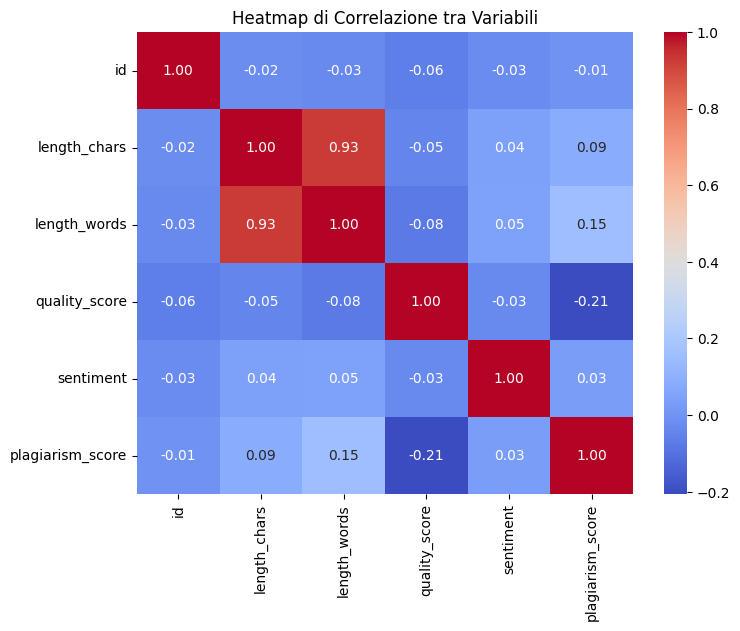

In [ ]:
# 4. HEATMAP DI CORRELAZIONE
plt.figure(figsize=(8, 6))
# Calcoliamo la correlazione solo sulle colonne numeriche
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap di Correlazione tra Variabili')
plt.show()

In [ ]:
# Configurazione stile
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

Feature Engineering

Creazione Identikit del testo (Feature Strutturate):
Invece di leggere solo le parole, estraiamo dei segnali numerici che descrivono come è fatto il testo:
-La forma: prendendo la lunghezza (caratteri e parole) e l'emozione del testo (sentiment).
-I voti: includendo quanto il testo è di qualità e quanto sembra copiato (plagiarism_score).
-Il contesto: One-Hot Encoding, abbiamo trasformato l'argomento (es. "Sport" o "Scienza") in una serie di colonne "0" e "1".
-Il livellamento: Usando lo StandardScaler, abbiamo messo tutti questi numeri sulla stessa scala. Senza questo, il modello darebbe più importanza ai numeri grandi (come i caratteri) rispetto a quelli piccoli (come il sentiment).

Estrazione "Parole Spia" (Feature Testuali):
Il computer non capisce le frasi, quindi con il TF-IDF abbiamo trasformato il testo in una lista di numeri basata sulle parole più importanti.
Il modello ora sa se certe parole (es. "analisi", "indicazione", "tuttavia") compaiono più spesso nei testi AI o in quelli umani.
Abbiamo limitato questa analisi alle 100 parole più significative per non appesantire troppo il calcolo.

Creazione Approccio Ibrido:
Unione dei due mondi:
X_ibrido: È una tabella che per ogni testo dice: "Questo testo è lungo X, ha un sentiment Y, parla di Scienza (1) e contiene le parole 'dati' e 'risultati' con una certa frequenza".
Dimensioni finali: Il messaggio (451, 115) (circa) significa che hai 451 testi e, per ognuno, il modello ha ora 115 indizi diversi per decidere se è AI o Human.

Target (y):
Creazione della "soluzione dell'enigma":
1 (AI)
0 (Human) Il modello userà y durante l'addestramento per capire se le sue supposizioni basate su X_ibrido sono corrette o meno.

Serve a dimostrare che per smascherare l'AI non basta leggere le parole, ma bisogna guardare anche la struttura (quanto è ripetitiva, quanto è precisa, che tono usa). Unendo numeri e parole, il tuo modello sarà molto più difficile da ingannare.

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Caricamento dati
df = pd.read_csv('ai_vs_human_dataset_medium_clean.csv')

# --- 2. FEATURE STRUTTURATE ---
# Trasformiamo i Topic in numeri (One-Hot Encoding)
df_topic = pd.get_dummies(df['topic'], prefix='topic')

# Scaliamo le variabili numeriche
scaler = StandardScaler()
cols_num = ['length_chars', 'length_words', 'sentiment', 'quality_score', 'plagiarism_score']
df[cols_num] = scaler.fit_transform(df[cols_num])

# Creiamo l'oggetto features_strutturate
features_strutturate = pd.concat([df[cols_num], df_topic], axis=1)

# --- 3. FEATURE TESTUALI ---
tfidf = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])
features_testuali = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# --- 4. APPROCCIO IBRIDO (Concatenazione) ---
# Ora entrambe le variabili esistono e possono essere unite
X_ibrido = pd.concat([features_strutturate, features_testuali], axis=1).reset_index(drop=True)

# Target
y = df['label'].map({'ai': 1, 'human': 0})

print(f"Dataset ibrido creato correttamente!")
print(f"Dimensioni finali: {X_ibrido.shape}")

Dataset ibrido creato correttamente!
Dimensioni finali: (451, 105)


RANDOM FOREST

Accuracy Totale: 1.00

Report di Classificazione:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        49

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



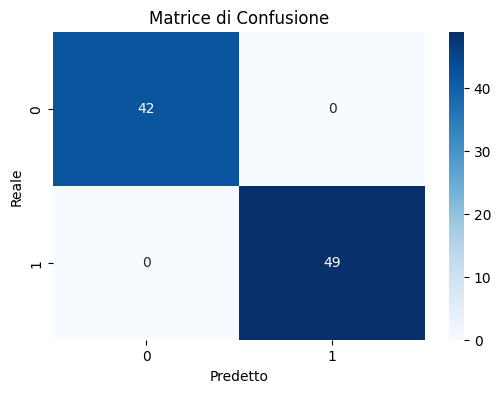

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Split dei dati: 80% per l'addestramento, 20% per il test
X_train, X_test, y_train, y_test = train_test_split(X_ibrido, y, test_size=0.2, random_state=42)

# 2. Creazione e addestramento del modello
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Predizione sui dati di test
y_pred = model.predict(X_test)

# 4. Valutazione dei risultati
print(f"Accuracy Totale: {accuracy_score(y_test, y_pred):.2f}")
print("\nReport di Classificazione:")
print(classification_report(y_test, y_pred))

# 5. Visualizzazione della Matrice di Confusione
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.title('Matrice di Confusione')
plt.show()

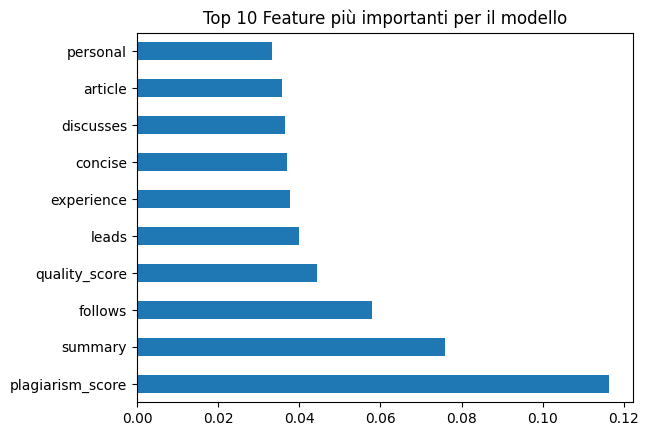

In [31]:
# Vediamo quali sono le caratteristiche che contano di più
importances = pd.Series(model.feature_importances_, index=X_ibrido.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature più importanti per il modello')
plt.show()